# Data exploration using data visualization
- Why data visualization is important.
- Try to understand it using **Anscombe's Quartet**



In [ ]:
# importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

In [ ]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

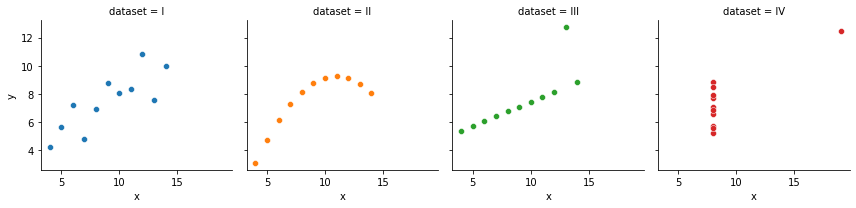

In [ ]:
g= sns.FacetGrid(data=anscombe, col='dataset', hue='dataset')
g.map_dataframe(sns.scatterplot, x="x", y="y")

## Certain points to remember
- Data visualization does not mean only creating beautiful plots. It also means correct plot which gives us meaningful information.
- Whenever possible please expplain your axes (x and y) and figure as title.
- It is a must to explain all figures. Just generating a figure does not make sense. We must have to explain the insight from the figure.

**Explanation**: From the above figure it is clear that mean, standard deviation and Pearson correlation value is same. If we do not create figures, we will assume that they are equal. From the above figures, it is clear that they are different.  

In [ ]:
Gapminder = px.data.gapminder() # obtaining data from plotly library

In [ ]:
Gapminder.tail(10)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1694,Zimbabwe,Africa,1962,52.358,4277736,527.272182,ZWE,716
1695,Zimbabwe,Africa,1967,53.995,4995432,569.795071,ZWE,716
1696,Zimbabwe,Africa,1972,55.635,5861135,799.362176,ZWE,716
1697,Zimbabwe,Africa,1977,57.674,6642107,685.587682,ZWE,716
1698,Zimbabwe,Africa,1982,60.363,7636524,788.855041,ZWE,716
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


## Univariate analysis
- Uni means one. Hence analysing one variable only.

## Multivariate 
- Multi means __*many*__


## Bivariate 
- Bi means __*two*__ variables. Analyzing two variables. For example: Correlation analysis and scatter plot.

As Gapminder dataset contains values for different countries from 1952-2007. It is suggestive to filter data for specific years. As combining all years together will not make any sense for many different analysis.
- Calculating measures of centrel tendancy and dispersion will not make sense if it from 1952 - 2007. Similarly many figures may not make sense. 

In [ ]:
Gapminder_2007 = Gapminder[Gapminder["year"] == 2007]
Gapminder_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


### Univariate analysis
- Here the aim is to check the distribution of the data. 
- If it is normally distributed or skewed for numerical value. 
- If it is a categorical value then we have to check if categories are balanced on unblanced. 


### Bar plot, Histogram, Box plot, Density plot and Box plot
- Discussed during descriptive statistics session matplotlib and seaborn.
- Now we will use plotly whereever it is applicable.

### Bar plot

In [ ]:
data_india = px.data.gapminder().query("country == 'India'") # selecting only India
fig = px.bar(data_india, x='year', y='pop')# defining x and y axis
fig.show()

#### Altering figure size
- Too big or too small figures are also not good.
- Figure size should always be appropriate.

In [ ]:
data_india = px.data.gapminder().query("country == 'India'")
fig = px.bar(data_india, x='year', y='pop', width=800, height=400) # fixing the width and height of figure
fig.show()

#### Adding colors and labels

In [ ]:
fig = px.bar(data_india, x='year', y='pop', color="year", width=800, height=400, 
            labels={"year": "Year", "pop": "Population (in billion)"}) # fixing the width and height of figure
fig.update_layout(showlegend=False) # remove legend
fig.show()

In [ ]:
data_india["year"] = data_india["year"].astype('category') # converting year into categorical value as we are using them as category here

In [ ]:
fig = px.bar(data_india, x='year', y='pop', color="year", width=800, height=400, 
            labels={"year": "Year", "pop": "Population (in billion)"}) # fixing the width and height of figure
fig.update_layout(showlegend=False) # remove legend
fig.show()

**Explanation**: X axis represents Year and Y axis represents population in billion. From the above figure it is clear that population is constanly increaseing.

### Histogram

In [ ]:
fig = px.histogram(Gapminder_2007, x="lifeExp", nbins=15, width=800, height=400,
                  labels={"lifeExp": "Life Expectancy in year"})
fig.show()

### Box plot

In [ ]:
fig = px.box(Gapminder_2007, y="lifeExp", width=800, height=400,
            labels={"lifeExp": "Life Expectancy in year"})
fig.show()

**Explanation**: Histogram clearly suggests left skewness in the varaible. Box plot also suggested the same with moderate skewness. There is no outlier in the variable. 

In [ ]:
Gapminder_2007.lifeExp.skew() # calculating skewness

-0.6887770648577499

### Bivariate analysis
- When we try to see the relationship or difference between two variables. We have to be sure that our analysis should make sense. 
- **Each figure needs a proper explanation. Without explanation EDA is incomplete.**

### Examinig Categorical-Numerical data using box plot
- Here we aim to see if two or more categories differ or they are same based on a numeric value.
- Here we are aiming to see the difference in life expectency between different continent. 
- We may see some pattern here which may be important for machine learning models.

In [ ]:
fig = px.box(Gapminder_2007, x="continent", y="lifeExp", color="continent", notched=True, points="all", width=800, height=400,
            labels={"lifeExp": "Life Expectancy in year", "continent": "Continent"})
fig.show()

Above figure suggests that there is a difference in median value between different continents. It suggests Oceania has highest life expectency and Africa has the lowest life expectency. It also suggest presence of outliers in Americas and Asia. Difference in median value suggests this variable may be important for the model and further exploration may give more insight.
<br>
<br>
Box plot also gives insight about skewness in each category and presence of outliers

### Examinig Numerical-Numerical data to see the trend
- Technically a line plot is used to see the trend
- Other plots can also be used, but it should make sense

In [ ]:
# Examining the trend of GDP per capita of India
# Here we have unique value of GDP per capita  for specific year for year
# Hence line plot is good to give insight
Gapminder_India = Gapminder[Gapminder["country"] == 'India'] # filtering India from gapminder dataset
fig = px.line(Gapminder_India, x="year", y="gdpPercap", title='Change in GDP per capita in India from 1952 to 2007', width=700, height=350,
             labels={"gdpPercap": "GDP per capita", "year": "Year"})
fig.show()

In [ ]:
# Examining the trend of GDP per capita for all euorpean countries
# Here we have unique value of GDP per capita  for specific year for year
# Hence line plot is good to give insight
Gapminder_Americas = Gapminder[Gapminder['continent'] == 'Americas'] # filtering Europe from gapminder dataset
fig = px.line(Gapminder_Americas, x="year", y="gdpPercap", color='country', 
              title='Change in GDP per capita in America from 1952 to 2007', width=800, height=400,
             labels={"gdpPercap": "GDP per capita", "year": "Year"})
fig.show()

**Explanation**:Above figure explains change in GDP per capita in India from 1952 to 2007. X axis represents Year and Y axis represents GDP per capita. Above figure clearly suggests that there is an increase in GDP per capita since 1952. 

In [ ]:
Gapminder["year"] = Gapminder["year"].astype('category') # converting year into categorical value as we are using them as category here

In [ ]:
fig = px.box(Gapminder, x="year", y="lifeExp", color="year", width=800, height=400,
            labels={"lifeExp": "Life Expectancy in year", "year": "Year"})
fig.show()

Note: Although line plot is very commonly used to examine the trend when you have one data point for each time period. For multiple data points we can also use bar plot using median or box plot as above.
<br>
**Explanation**: From the above box plot, it is clear that as year increases life expectency also increases.


In [ ]:
fig = px.box(Gapminder, x="year", y="lifeExp", color="continent", width=800, height=400,
            labels={"lifeExp": "Life Expectancy in year", "year": "Year"})
fig.show()

Note: We might be interested to know how life expectancy is changing in different continents based on year. The above figure answer my question but a very complicated figure to see a pattern or find anything. In this scenario, figure is correct but not a good approach. Hence faceting them will be a better approach.

In [ ]:
# Faceting them based on continents
fig = px.box(Gapminder, x="year", y="lifeExp", facet_col="continent",color="continent",
            labels={"lifeExp": "Life Expectancy in year", "year": "Year"})
fig.show()

### Examinig Numerical-Numerical data to see the relationship
- To examine the relationship between two conitnuous variables scatter plot is a better appraoch
- It tells if two variables are correlated or not. 
- It may be positive, negative, no linear correlation or non-linear correlation.

In [ ]:
fig = px.scatter(Gapminder_2007, x="gdpPercap", y="lifeExp", width=800, height=400,
            labels={"lifeExp": "Life Expectancy in year", "gdpPercap": "GDP per capita"})
fig.show()

In [ ]:
fig = px.scatter(Gapminder_2007, x="gdpPercap", y="lifeExp", color="continent", width=800, height=400,
            labels={"lifeExp": "Life Expectancy in year", "gdpPercap": "GDP per capita"})
fig.show()

We can also add a third variable in scatter plot. Hence, it will be considered as a multivariate analaysis. As there are multiple continents, we can facet it by contients to see a better pattern. Even we can include more variables in figure.

In [ ]:
fig = px.scatter(Gapminder_2007, x="gdpPercap", y="lifeExp", facet_col="continent", color="country",
            labels={"lifeExp": "Life Expectancy in year", "gdpPercap": "GDP per capita"})
fig.show()

In [ ]:
# As relationship is not linear, we can try some transformation techniques
# Here we are just showing it as an example.
# We are converting gdp per capita column into log scale
fig = px.scatter(Gapminder_2007, x="gdpPercap", y="lifeExp", color="continent", width=800, height=400,
                 log_x=True, range_x=[100,100000],
            labels={"lifeExp": "Life Expectancy in year", "gdpPercap": "GDP per capita"})
fig.show()

In [ ]:
fig = px.scatter(Gapminder_2007, x="gdpPercap", y="lifeExp", facet_col="continent", color="country",
                 log_x=True, 
            labels={"lifeExp": "Life Expectancy in year", "gdpPercap": "GDP per capita"})
fig.show()

### Examinig Categorical-Categorical data
- It is examined to see if there is a relationship between two categories. For example, if vaccination reduces the number of death due to covid. People vaccinated no death during covid infection, vaccinated and death due to covid infection. Similarly, not vaccinated no death during covid infection, not vaccinated and death due to covid infection  
- This plot will tell us if there is a relationship between vaccination and death due to covid.

In [ ]:
medals = px.data.medals_long()
medals.head()


,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15


In [ ]:
fig = px.bar(medals, x="nation", y="count", color='medal', barmode='group')
fig.show()

- In this plot we do not see any relationship between gender and education. Overall females have low count in all educational categories.

### Regression plot
- Regression plot is used when we are sure that x is affecting y, otherwise scatter plot only.

In [ ]:
tips= px.data.tips()
fig = px.scatter(tips, x="total_bill", y="tip", trendline="ols", width=800, height=400)
fig.show()

### Bubble plot
- It is an extension of scatter plot and can be visualized to see the relationship among three or more variables.

In [ ]:
fig = px.scatter(Gapminder_2007, x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", size_max=60)
fig.show()

### Pairplot

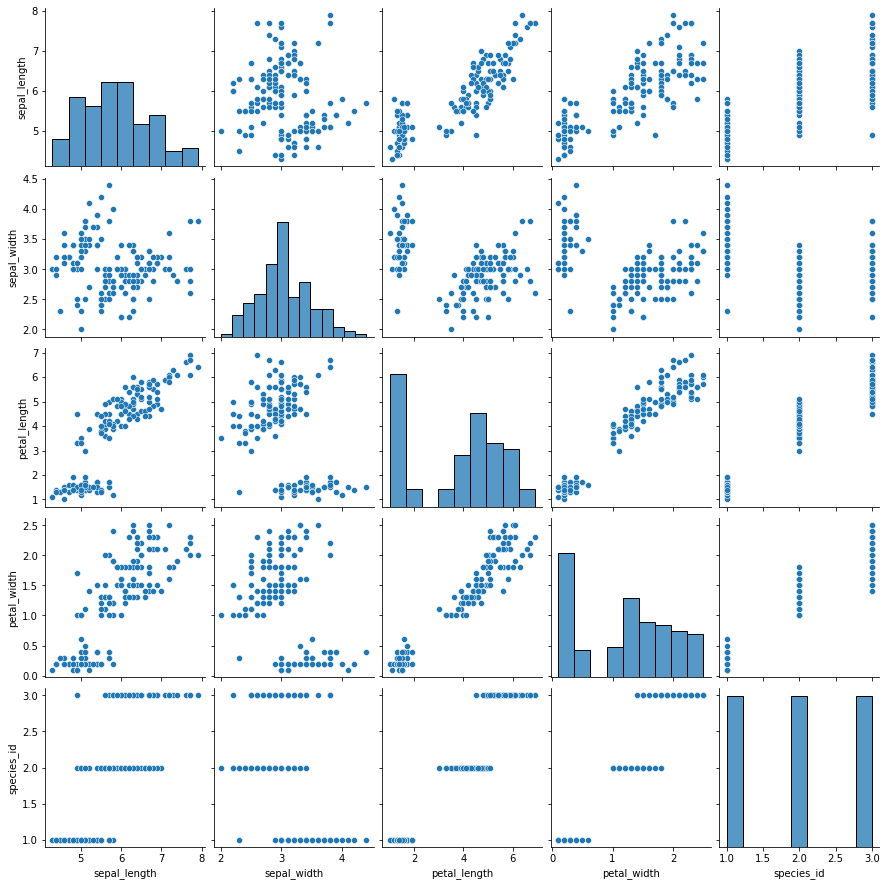

In [ ]:
iris = px.data.iris() # using plotly
# iris = sns.load_dataset("iris") # using seaborn
g = sns.pairplot(iris)
plt.show()

In [ ]:
# using plotly
fig = px.scatter_matrix(iris,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species")
fig.show()

### Heatmap 
- Here we are using a heatmap concept to create correlation matrix

In [ ]:
iris.corr()# By default it is a person correlation
# We only use numerical values, here we also have categorical values
# Has to follow pearson correlation assumptions, otherwise wrong
# species id is categorical in nature hence pearson correlation is not correct
# all assumptions have to be checked for pearson correlation

,sepal_length,sepal_width,petal_length,petal_width,species_id
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species_id,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
import plotly.figure_factory as ff
iris_corr = iris.corr() # Generate correlation matrix for pearson correlation

x = list(iris_corr.columns)
y = list(iris_corr.index)
z = np.array(iris_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show()

In [ ]:
iris.corr(method="spearman")# selecting the method as a spearman rank correlation

,sepal_length,sepal_width,petal_length,petal_width,species_id
sepal_length,1.000000,-0.159457,0.881386,0.834421,0.798078
sepal_width,-0.159457,1.000000,-0.303421,-0.277511,-0.434348
petal_length,0.881386,-0.303421,1.000000,0.936003,0.935441
petal_width,0.834421,-0.277511,0.936003,1.000000,0.937850
species_id,0.798078,-0.434348,0.935441,0.937850,1.000000


In [ ]:
import plotly.figure_factory as ff
iris_corr = iris.corr(method="spearman") # Generate correlation matrix for spearman correlation

x = list(iris_corr.columns)
y = list(iris_corr.index)
z = np.array(iris_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show()

### 3D plot

In [ ]:
fig = px.scatter_3d(Gapminder_2007, x='pop', y='gdpPercap', z='lifeExp',
              color='country', size='gdpPercap',size_max=60)
fig.show()

In [ ]:
px.scatter(Gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           size_max=35, range_x=[0,60000], range_y=[25,90])

### Treemap

In [ ]:
fig = px.treemap(Gapminder_2007, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(Gapminder_2007['lifeExp'], weights=Gapminder_2007['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
fig = px.treemap(Gapminder_2007, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='gdpPercap', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(Gapminder_2007['lifeExp'], weights=Gapminder_2007['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Sunburst chart

In [ ]:
fig = px.sunburst(Gapminder, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(Gapminder['lifeExp'], weights=Gapminder['pop']))
fig.show()